In [1]:
import processing
import modeling
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy.random as random
import numpy as np
import functions as f

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style('darkgrid')
random.seed(seed=43)

# ElasticNet regression on gender attitudes composite

Loaded 57061 rows...
Done!
Loaded 153 rows...
Done!
train R^2
0.108472508939
test R^2
0.113257983527
train R^2 - no court predictors
0.108934610931
test R^2 - no court predictors
0.107936230002


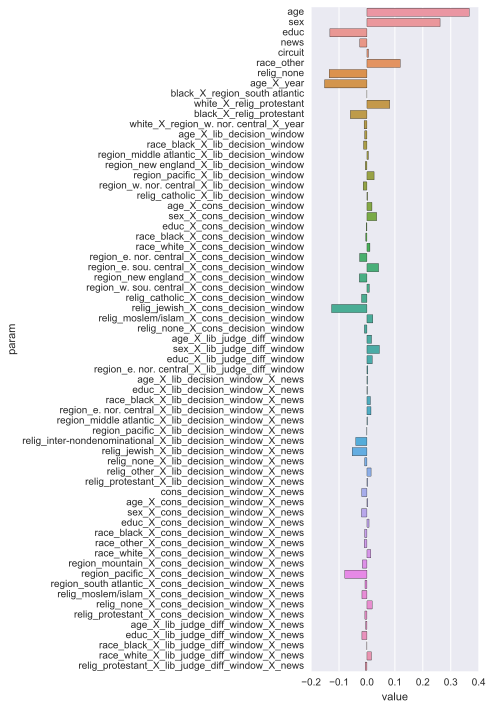

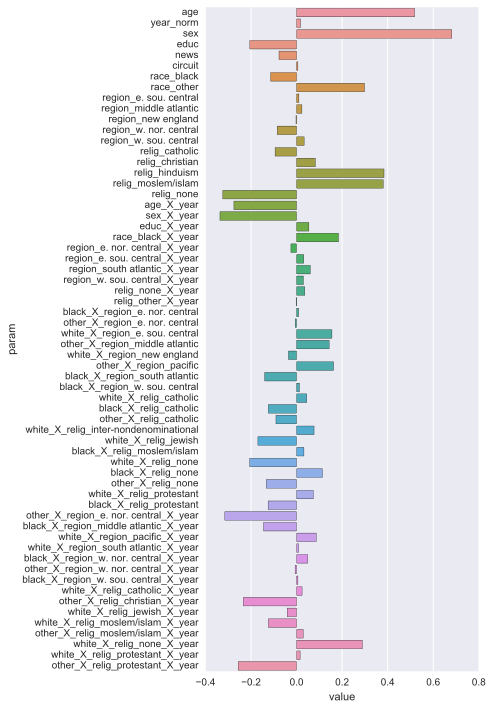

In [6]:
gss = processing.preprocess_gss()
court = processing.preprocess_court_data()
data, y_col, x_cols, x_cols_nocourt = processing.process_combined_data(gss, court, 'genderValue')

train, test = modeling.split_train_test(data)

court, no_court = modeling.fit_model(train, test, y_col, x_cols, x_cols_nocourt)

# plot model with court predictors
modeling.plot_fit(data, court, x_cols)

# plot model without court predictors
modeling.plot_fit(data, no_court, x_cols_nocourt)

# Independent measures and gender composite (with bootstrap CIs)

Loaded 57061 rows...
Done!


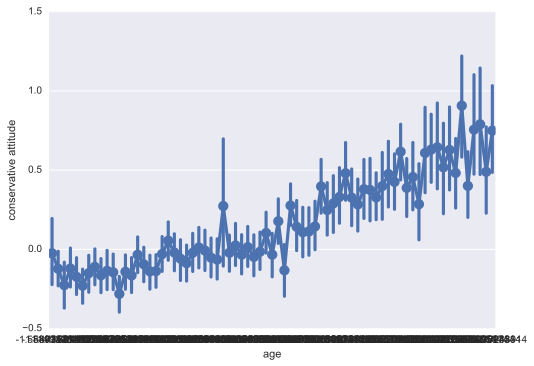

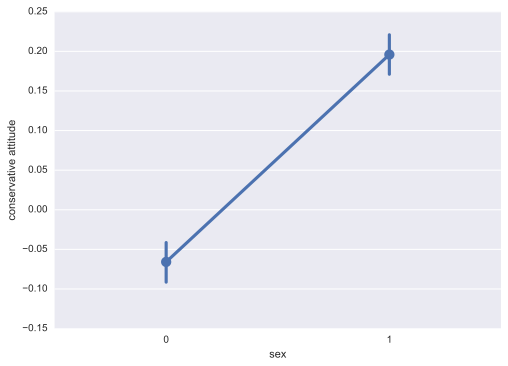

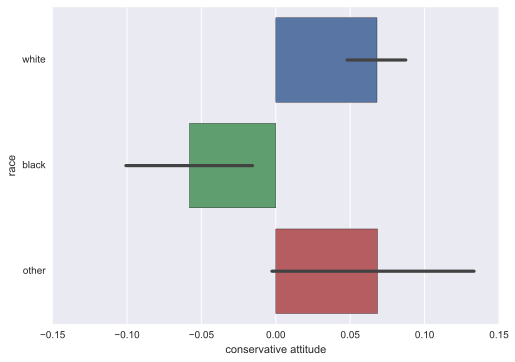

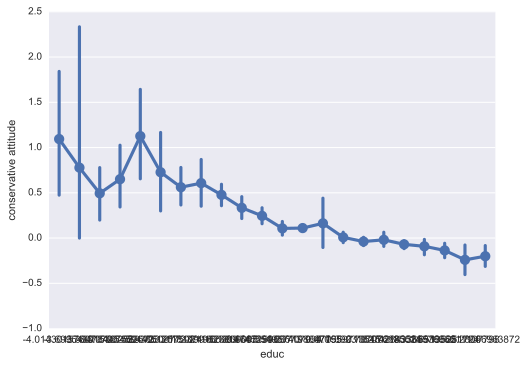

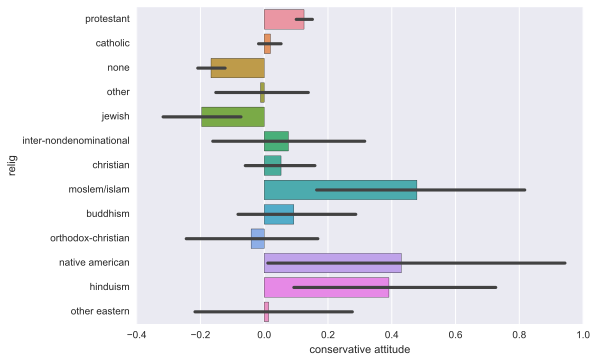

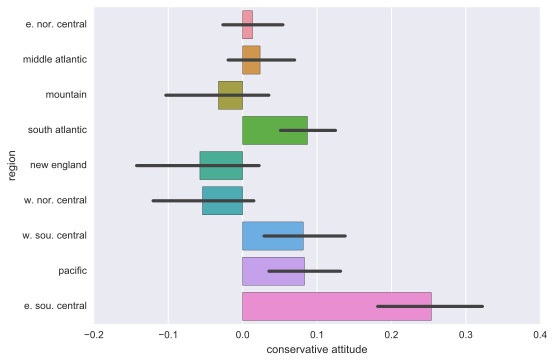

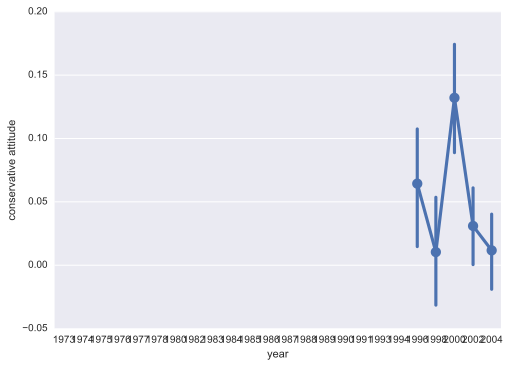

In [3]:
gss = processing.preprocess_gss(convert_to_one_hot=False)

relevantCols = ['age', 'sex', 'race', 'educ', 'relig', 'region', 'year']

for col in  relevantCols:   
    if gss[col].dtype == 'O':
#         sns.barplot(grouped.genderValue['mean'],grouped.index,orient='h',ci=grouped.genderValue['std'])
        sns.barplot(y=col, x="genderValue", data=gss, orient='h')
        plt.ylabel(col)
        plt.xlabel('conservative attitude')
    else:
#         plt.plot(grouped.index,grouped.genderValue['mean'])
        sns.pointplot(x=col, y="genderValue", data=gss, marker='')
        plt.xlabel(col)
        plt.ylabel('conservative attitude')
    plt.show()

# Some correlations.. (possibly more interesting once interaction terms are added)

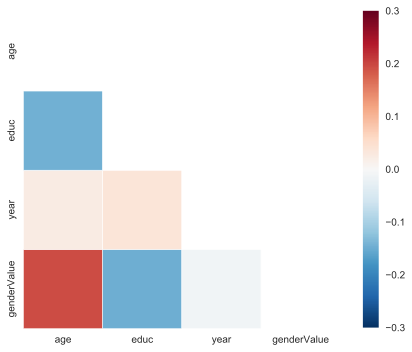

In [7]:
relevantCols = ['age', 'educ', 'year','genderValue']
sns.set(style="white")

# Compute the correlation matrix
corr = gss[relevantCols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3,
            square=True, 
            linewidths=.5)

In [8]:
corr = gss[relevantCols].corr()
print corr

                  age      educ      year  genderValue
age          1.000000 -0.143405  0.024320     0.196840
educ        -0.143405  1.000000  0.037635    -0.147004
year         0.024320  0.037635  1.000000    -0.011192
genderValue  0.196840 -0.147004 -0.011192     1.000000
